In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mglearn
from plotnine import *
import warnings
warnings.filterwarnings(action='ignore')

# 
# 
## 차원축소
### 주성분 분석 (PCA)

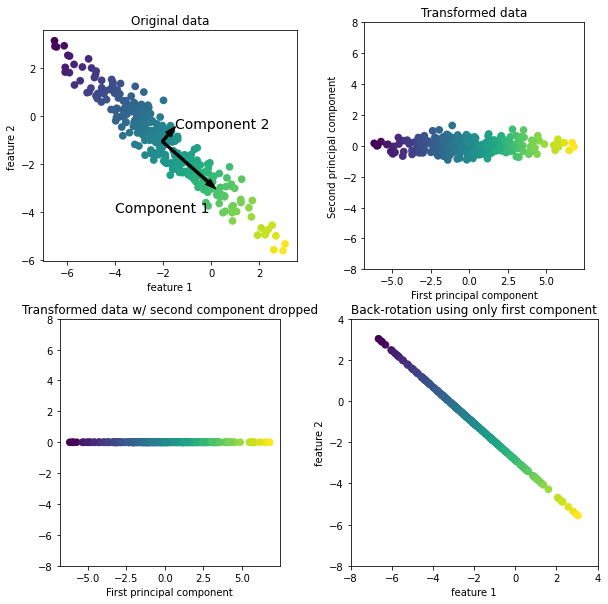

In [2]:
mglearn.plots.plot_pca_illustration()

- 분산이 가장 큰 방향 탐색 (성분 1)
- 방향이 데이터에서 가장 많은 정보를 담고 있는 방향
- 변수들의 상관관계가 가장 큰 방향
- 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향 탐색
- 탐색한 방향을 데이터에 있는 주된 분산의 방향 => **주성분**
- 데이터에서 평균을 빼서 중심을 원점에 맞춤 
- PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0
- 원본 변수 중 가장 유용한 방향을 찾아서 그 방향의 성분 (첫 번째 주성분)을 유지
- 데이터에서 다시 평균을 더하고 반대로 회전 
- 원래 변수와 같이 공간에 놓여 있지만, 첫 번째 주성분의 정보만 담고 있음

# 
### ```sklearn.decomposition.PCA(n_components, whiten, ...)```
- ```n_components``` : 유지시킬 주성분의 개수
- ```whiten``` : True이면, 화이트닝 옵션 사용

# 
- **변수의 스케일이 서로 다르면 올바른 주성분 방향을 찾을 수 없음 => 표준화 실행**
- **PCA에서는 특잇값 분해(SVD)를 통해 주성분을 탐색**

In [2]:
heart = pd.read_csv("C:/Soongsil/4-2학기/데이터 마이닝/데마 조별/heart.csv")
target = heart.HeartDisease
feature = heart.drop("HeartDisease", axis = 1)

In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
ct = make_column_transformer(
    (StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']),
    (OneHotEncoder(sparse = False), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(feature, target,
                                                     train_size=0.7, random_state=0)
ct.fit(x_train, y_train)
x_train_trans = ct.fit_transform(x_train, y_train)
x_test_trans = ct.fit_transform(x_test, y_test)

- **변수의 스케일이 서로 다르면 올바른 주성분 방향을 찾을 수 없음 => 표준화 실행**
- **PCA에서는 특잇값 분해(SVD)를 통해 주성분을 탐색**

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA().fit(x_train_trans)

In [10]:
x_pca = pca.transform(x_train_trans)
x_train_trans.shape, x_pca.shape

((642, 20), (642, 20))

- **설명된 분산 & 분산비**

In [11]:
np.round(pca.explained_variance_, 3)

array([2.236, 1.318, 0.978, 0.793, 0.671, 0.602, 0.347, 0.319, 0.302,
       0.281, 0.236, 0.189, 0.171, 0.078, 0.059, 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [12]:
np.cumsum(np.round(pca.explained_variance_ratio_, 5))

array([0.26065, 0.4143 , 0.52826, 0.62063, 0.69881, 0.76895, 0.80935,
       0.84651, 0.88177, 0.91458, 0.94204, 0.96404, 0.98397, 0.99311,
       0.99999, 0.99999, 0.99999, 0.99999, 0.99999, 0.99999])

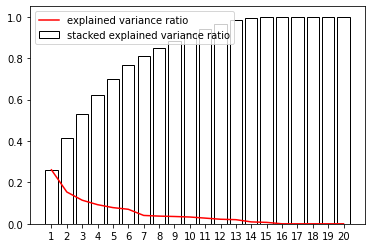

In [13]:
plt.bar(range(20), np.cumsum(np.round(pca.explained_variance_ratio_, 5)),
        fill = False, label = 'stacked explained variance ratio')
plt.plot(range(20), np.round(pca.explained_variance_ratio_, 5), 'r',
         label = 'explained variance ratio')
plt.xticks(range(20), range(1, 21))
plt.legend()
plt.show()

# 

In [14]:
pca = PCA(n_components=2).fit(x_train_trans)
x_pca = pca.transform(x_train_trans)
x_pca_df = pd.DataFrame(x_pca).assign(
    label = np.where(y_train == 1, '1', '0')
)

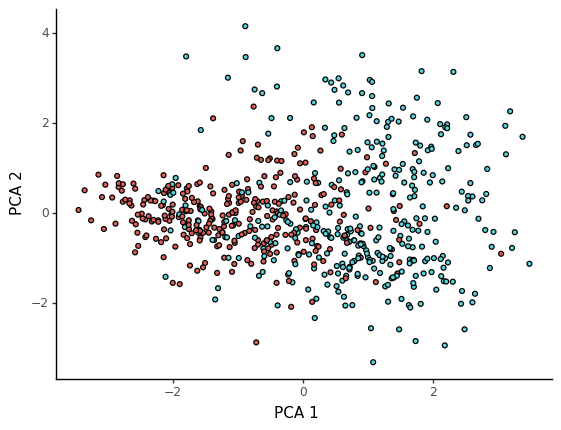

<ggplot: (181203377116)>

In [15]:
ggplot(x_pca_df, aes('x_pca_df[0]', 'x_pca_df[1]', fill = 'label')) + \
    geom_point() + \
    labs(x = 'PCA 1', y = 'PCA 2') + \
    theme_classic() + \
    theme(legend_position='none')

- **주성분은 원 데이터에 있는 어떤 방향에 대응하는 여러 설명변수들의 선형결합**

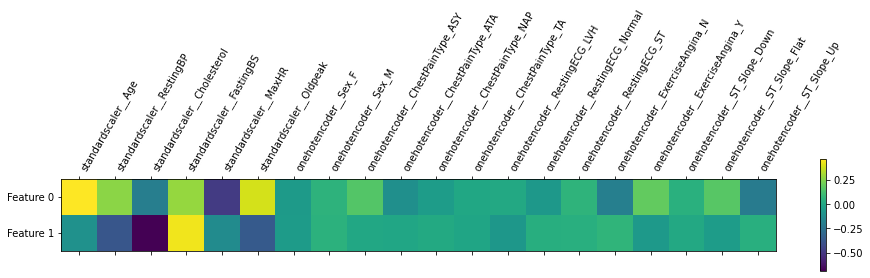

In [16]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ["Feature 0", "Feature 1"])
plt.xticks(range(x_train_trans.shape[1]), ct.get_feature_names_out(), 
           rotation = 60, ha = 'left')
plt.colorbar()
plt.show()

# 
# 
# 
### 고유얼굴 변수 추출

In [17]:
from sklearn.datasets import fetch_lfw_people

In [18]:
people = fetch_lfw_people(min_faces_per_person=20, resize = 0.7, color=False)

- LFW 데이터셋은 62명의 얼굴을 찍은 이미지가 총 3023개
- 각 이미지의 크기는  87 X 65픽셀

In [19]:
people.images.shape, people.target.shape, len(people.target_names)

((3023, 87, 65), (3023,), 62)

In [20]:
image_shape = people.images[0].shape
image_shape

(87, 65)

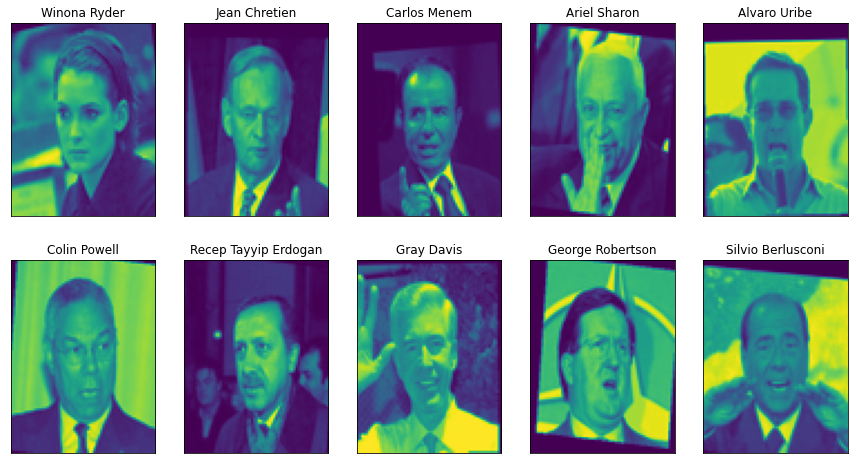

In [21]:
fig, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw = {'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

- 헤딩 데이터는 조지 부시와 콜린 파월의 이미지가 많음

In [22]:
count_df = pd.DataFrame(np.bincount(people.target),
                        columns = ['count'])
count_df.index = people.target_names
count_df.sort_values(by = ['count'], ascending=False).head(5)

,count
George W Bush,530
Colin Powell,236
Tony Blair,144
Donald Rumsfeld,121
Gerhard Schroeder,109


- 데이터의 편중을 없애기 위해, 사람마다 50개의 이미지만 선택

In [23]:
mask = np.zeros(people.target.shape, dtype = bool)

In [24]:
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

mask

array([ True,  True,  True, ..., False, False, False])

In [25]:
x_people = people.data[mask]
y_people = people.target[mask]
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, 
                                                    random_state=0)
x_train.shape, x_test.shape

((1547, 5655), (516, 5655))

- **0 ~ 255 사이의 흑백 이미지의 픽셀 값을 0 ~ 1 스케일로 조정**

In [26]:
x_people = x_people / 255.

# 
- **픽셀을 사용해서 두 이미지를 비교할 때, 각 픽셀의 회색톤 값을 다른 이미지에서 동일한 위치에 잇는 픽셀 값과 비교 => 이와같이, 픽셀을 있는 그대로 비교하는 방식으로는 얼굴의 특징을 잡아내기 어려움**
- **=> PCA의 화이트닝 옵션을 사용해서 주성분의 스케일이 같아지도록 조정**
- **이는 화이트닝 옵션 없이 변환한 후에, StandardScaler를 적용하는 것과 동일**

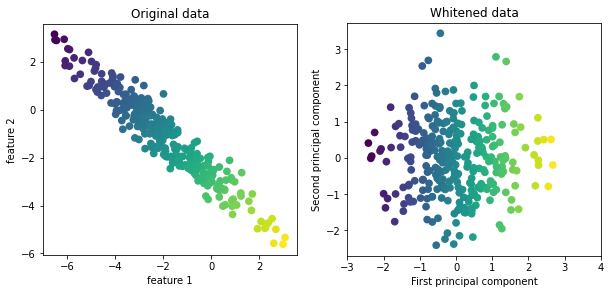

In [27]:
mglearn.plots.plot_pca_whitening()

In [28]:
pca = PCA(n_components = 100, whiten = True, random_state=0).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

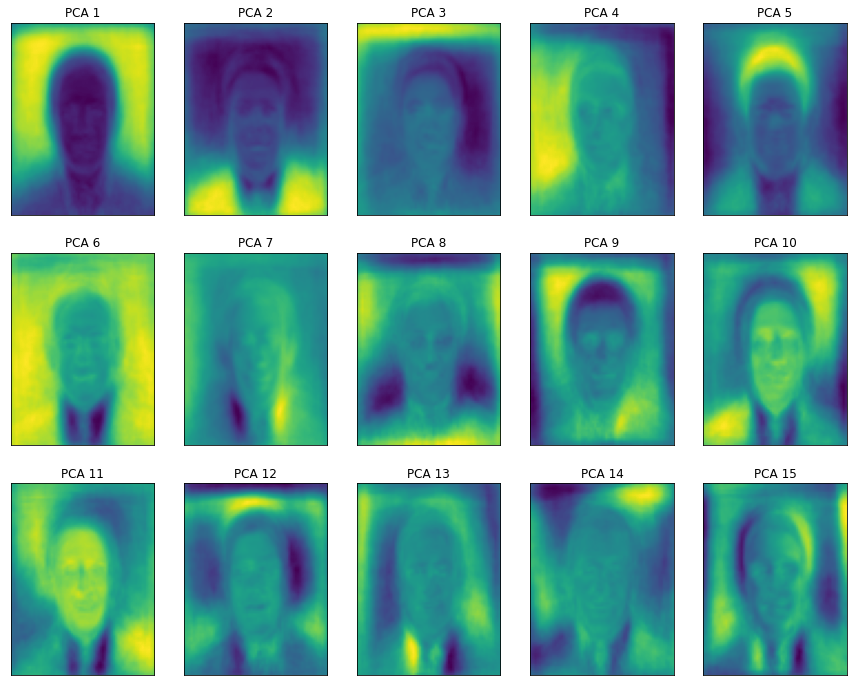

In [29]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("PCA {}".format((i+1)))

# 
- **주성분을 10개만 사용했을 땐 얼굴의 각도, 조명 같은 이미지의 기본 요소만 표현**
- **주성분을 더 많이 사용할수록, 이미지가 더욱 상세**

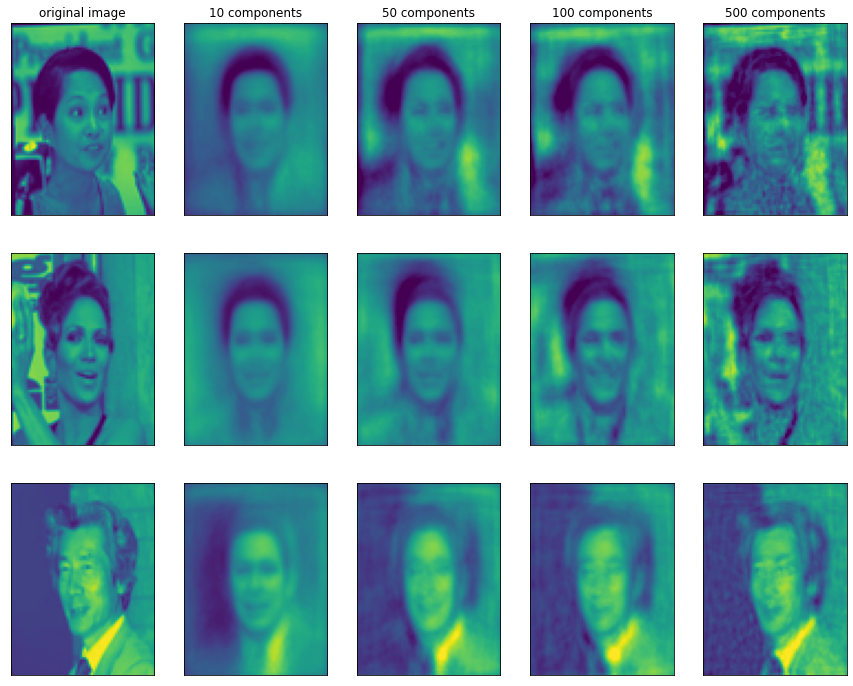

In [30]:
mglearn.plots.plot_pca_faces(x_train, x_test, image_shape)

In [31]:
pca_df = pd.DataFrame(x_train_pca[:, 0:2]).assign(
    label = y_train
)

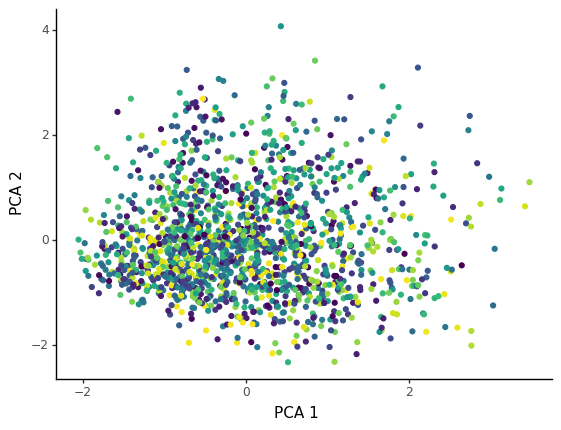

<ggplot: (181203379444)>

In [32]:
ggplot(pca_df, aes('pca_df[0]', 'pca_df[1]')) + \
    geom_point(aes(fill = 'label', color = 'label')) + \
    labs(x = 'PCA 1', y = 'PCA 2') + \
    theme_classic() + \
    theme(legend_position='none')

# 
# 
### 비음수 행렬 분해 (NMF)
- PCA에서 데이터의 분산이 가장 크고 수직인 성분을 찾았다면, NMF에서는 음수가 아닌 성분과 계수 값을 탐색
- 즉 주성분과 계수가 모두 0보다 크거나 같아야됨
- **음수를 포함하지 않은 입력 데이터 X를, 음수를 포함하지 않은 변환 데이터 W와 성분 H의 곱으로 분해하는 알고리즘**

    - $X = WH$를 만족하는 $W, H$를 구하기 위해 L2노름인 프로베니우스 노름의 제곱으로 만든 목적 함수 ${1 \over 2}\sum_{ij}(X_{ij}-WH_{ij})^2$
    - $H$는 NMF 객체의 ```components_```속성에 저장

- 음수가 아닌 가중치 합으로 데이터를 분해하는 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여 만들어진 데이터에 특히 유용
- **PCA가 재구성 측면에서 최선의 방향을 탐색 / NMF는 데이터의 유용한 패턴을 찾는데 활용**
# 
### ```sklearn.decompose.NMF(n_components, solver, init)```
- ```n_components```
- ```solver``` : 'cd' : 좌표 하강법 (default) / 'mu' : 곱셈 업데이트 알고리즘 
- ```init``` : 초기화 방식, 
    - 'none' 
    - 'nndsvd' : 특잇값 분해로 얻은 U와 V 행렬의 절댓값에 S행렬의 제곱근을 곱해 W와 H를 생성. 그 다음 W와 H행렬에서 1e-6보다 작은 값은 0으로 변환
    - 'nndsvda' : 0을 입력 행렬의 평균 값으로 변환
    - 'random' : 데이터 평균을 성분의 개수로 나눈 후 제곱근을 구함. 다음 정규분포의 난수를 발생시켜, 앞에서 구한 제곱근을 곱하여 H와 W행렬을 생성 => 데이터 평균값을 각 성분과 두 개의 행렬에 나누어서 놓는 효과


- ```n_components```가 샘플이나 변수 개수보다 작으면 ```init```은 'nndsvd', 그렇지 않으면 'random'

# 
- **NMF로 데이터를 다루려면, 주어진 데이터가 양수인지 확인해야 함**
- **원점 (0, 0)에서 상대적으로 어디에 놓여 있는지가 NMF에서는 중요**
- **원점 (0, 0)에서 데이터로 가는 방향을 추출한 것으로 음수 미포함 성분을 이해할 수 있음**

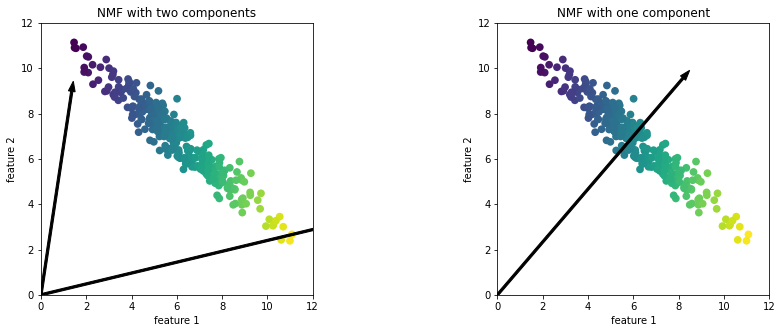

In [33]:
mglearn.plots.plot_nmf_illustration()

# 
# 

- **성분들은 모두 양수값 => PCA 성분보다 훨씬 더 얼굴 원형처럼 보임**

In [34]:
from sklearn.decomposition import NMF

In [35]:
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(x_train)
x_train_nmf = nmf.transform(x_train)
x_test_nmf = nmf.transform(x_test)

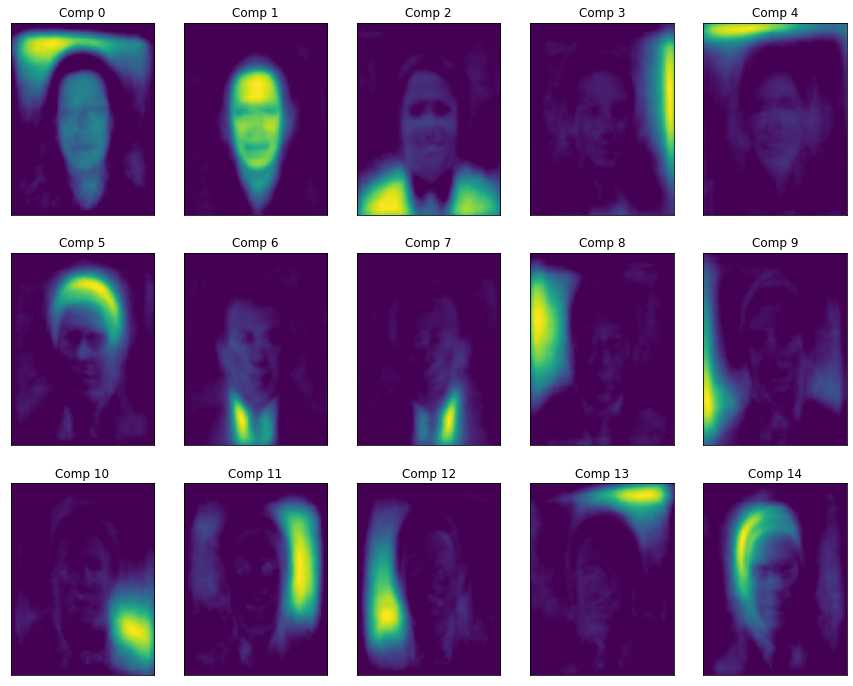

In [37]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12),
                         subplot_kw = {'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("Comp {}".format(i))

In [49]:
x_train_nmf.shape, x_train_nmf.shape

((1547, 15), (1547, 15))

- **성분 3의 계수 값이 큰 얼굴들**

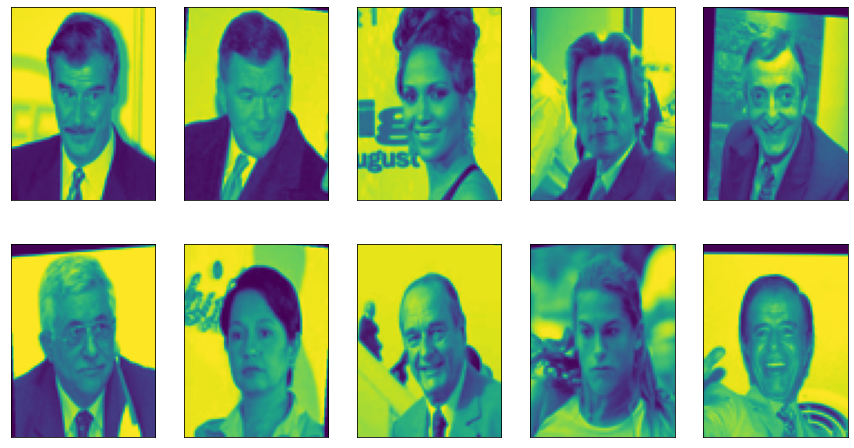

In [51]:
compn = 3

inds = np.argsort(x_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))

- **성분 7의 계수가 큰 얼굴들은 얼굴이 대체로 왼쪽으로 돌아가 잇음**

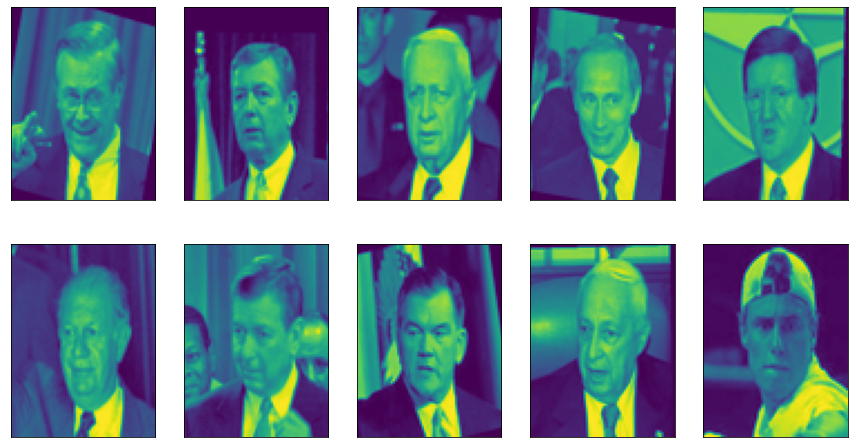

In [52]:
compn = 7

inds = np.argsort(x_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))

# 
# 
#### NMF는 소리, 유전자 표현, 텍스트 데이터 등 덧붙이는 구조를 가진 데이터의 패턴 추출에 적합

- **세 개의 서로 다른 입력으로부터 합성된 신호**

In [95]:
S = mglearn.datasets.make_signals()
S.shape

(2000, 3)

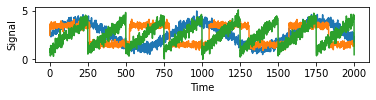

In [92]:
plt.figure(figsize = (6, 1))
plt.plot(S)
plt.xlabel("Time")
plt.ylabel("Signal")
plt.show()

- **100개의 측정 장치로 관찰 => 각 장치는 일련의 측정 데이터 제공**

In [96]:
A = np.random.RandomState(0).uniform(size = (100, 3))
X = np.dot(S, A.T)
X.shape

(2000, 100)

In [97]:
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
S_.shape

(2000, 3)

In [98]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
H.shape

(2000, 3)

- **NMF는 원본 신호를 잘 복원**
- **PCA는 실해, 데이터 변동의 대부분을 첫 번째 성분을 사용해 나타냄**

In [117]:
models = [X, S, S_, H]
names = ['Recorded Signal (first 3)', 'Original Signal', 
         'NMF restored Signal', 'PCA restored Signal']

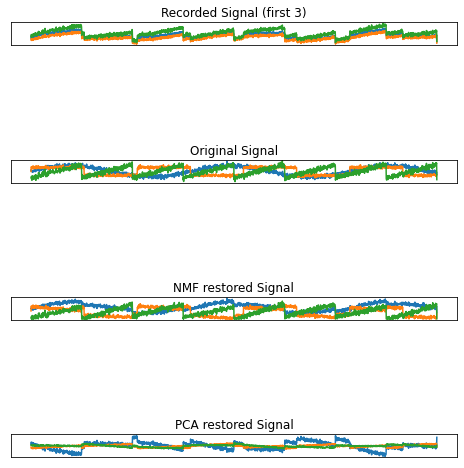

In [118]:
fig, axes = plt.subplots(4, figsize=(8, 8), gridspec_kw={'hspace': 5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

plt.show()

# 
# 
### Incremental PCA 
- https://runebook.dev/ko/docs/scikit_learn/auto_examples/decomposition/plot_incremental_pca
- PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
- Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
- 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용

### ```sklearn.decomposition.IncrementalPCA(n_components)```

In [119]:
from sklearn.decomposition import IncrementalPCA

In [128]:
IncrPCA = IncrementalPCA().fit(x_train_trans)
x_train_IncrPCA = IncrPCA.fit_transform(x_train_trans)
x_test_IncrPCA = IncrPCA.fit_transform(x_test_trans)

In [130]:
IncrPCA.components_.shape

(20, 20)

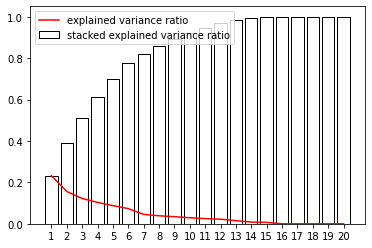

In [136]:
plt.bar(range(20), np.cumsum(np.round(IncrPCA.explained_variance_ratio_, 5)),
        fill = False, label = 'stacked explained variance ratio')
plt.plot(range(20), np.round(IncrPCA.explained_variance_ratio_, 5), 'r',
         label = 'explained variance ratio')
plt.xticks(range(20), range(1, 21))
plt.legend()
plt.show()

In [148]:
IncrPCA = IncrementalPCA(n_components=2).fit(x_train_trans)
x_train_IncrPCA = IncrPCA.transform(x_train_trans)
x_test_IncrPCA = IncrPCA.transform(x_test_trans)

In [152]:
x_IncrPCA_df = pd.DataFrame(x_train_IncrPCA).assign(
    label = np.where(y_train == 1, '1', '0')
)

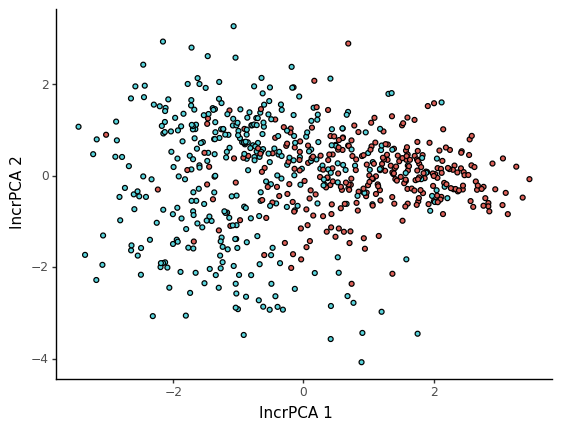

<ggplot: (181200591734)>

In [155]:
ggplot(x_IncrPCA_df, aes('x_IncrPCA_df[0]', 'x_IncrPCA_df[1]', fill = 'label')) + \
    geom_point() + \
    labs(x = 'IncrPCA 1', y = 'IncrPCA 2') + \
    theme_classic() + \
    theme(legend_position='none')

# 
# 
### Kernel PCA
- https://mldlcvmjw.tistory.com/219
- 차원 축소를 위한 복잡한 비선형 투형

### ```sklearn.decomposition.KernelPCA(n_components, kernel)```

In [137]:
from sklearn.decomposition import KernelPCA

In [138]:
kerPCA = KernelPCA(kernel = 'rbf').fit(x_train_trans)
x_train_kerPCA = kerPCA.fit_transform(x_train_trans)
x_test_kerPCA = kerPCA.fit_transform(x_test_trans)

In [147]:
kerPCA.alphas_.shape, kerPCA.eigenvectors_.shape, kerPCA.lambdas_.shape

((276, 275), (276, 275), (275,))

In [163]:
kerPCA = KernelPCA(n_components=2).fit(x_train_trans)
x_train_kerPCA = kerPCA.transform(x_train_trans)
x_test_kerPCA = kerPCA.transform(x_test_trans)

In [164]:
x_kerPCA_df = pd.DataFrame(x_train_kerPCA).assign(
    label = np.where(y_train == 1, '1', '0')
)

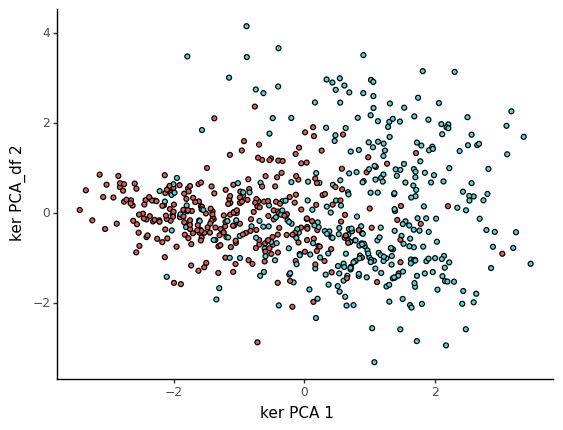

<ggplot: (181219168880)>

In [165]:
ggplot(x_kerPCA_df, aes('x_kerPCA_df[0]', 'x_kerPCA_df[1]', fill = 'label')) + \
    geom_point() + \
    labs(x = 'ker PCA 1', y = 'ker PCA_df 2') + \
    theme_classic() + \
    theme(legend_position='none')

# 
# 
### Sparce PCA
- PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형결합으로 나타난다는 점
- 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복
- Sparse PCA는 피쳐가 매우 많은 자료에 대해서 사용할 수 있는 PCA기법이다. 기본적인 컨셉은 전체 피쳐를 사용하는 것이 아니라, 중요하다고 생각되는 피쳐에 대해서만 PCA를 해주는 기법이라고 한다.
- 특히 Sparse PCA가 중요한 이유는 현대에 가장 빈번하게 등장하는 문제 중 하나인 N«P 의 문제에 대응을 할 수 있다는 점이다.
### ```sklearn.decomposition.SparsePCA(n_components)```

In [166]:
from sklearn.decomposition import SparsePCA

In [168]:
SpaPCA = SparsePCA().fit(x_train_trans)
x_train_SpaPCA = SpaPCA.fit_transform(x_train_trans)
x_test_SpaPCA = SpaPCA.fit_transform(x_test_trans)

In [175]:
SpaPCA.components_.shape,

((20, 20),)

In [176]:
SpaPCA = SparsePCA(n_components=2).fit(x_train_trans)
x_train_SpaPCA = SpaPCA.transform(x_train_trans)
x_test_SpaPCA = SpaPCA.transform(x_test_trans)

In [177]:
x_SpaPCA_df = pd.DataFrame(x_train_SpaPCA).assign(
    label = np.where(y_train == 1, '1', '0')
)

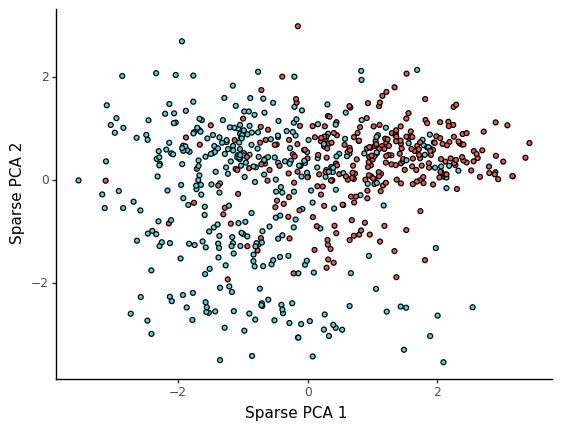

<ggplot: (181210379731)>

In [180]:
ggplot(x_SpaPCA_df, aes('x_SpaPCA_df[0]', 'x_SpaPCA_df[1]', fill = 'label')) + \
    geom_point() + \
    labs(x = 'Sparse PCA 1', y = 'Sparse PCA 2') + \
    theme_classic() + \
    theme(legend_position='none')

# 
# 
### Truncated Singular Value Decomposition (Truncated SVD)
- https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-20-%ED%8A%B9%EC%9D%B4%EA%B0%92-%EB%B6%84%ED%95%B4Singular-Value-Decomposition
- PCA는 정방행렬(행과 열의 크기가 같은 행렬)에 대해서만 행렬 분해 가능
- SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
- PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse - Matrix)에 대한 변환도 가능
- 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
- 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용
### ```sklearn.decomposition.TruncatedSVD(n_components)```

In [181]:
from sklearn.decomposition import TruncatedSVD

In [183]:
tSVD = TruncatedSVD().fit(x_train_trans)
x_train_tSVD = tSVD.fit_transform(x_train_trans)
x_test_tSVD = tSVD.fit_transform(x_test_trans)

In [188]:
tSVD.components_.shape, tSVD.singular_values_.shape

((2, 20), (2,))

In [175]:
SpaPCA.components_.shape,

((20, 20),)

In [192]:
tSVD.explained_variance_ratio_, tSVD.explained_variance_

(array([0.02109762, 0.22313559]), array([0.17965767, 1.90012074]))

In [193]:
tSVD = TruncatedSVD(n_components=2).fit(x_train_trans)
x_train_tSVD = tSVD.fit_transform(x_train_trans)
x_test_tSVD = tSVD.fit_transform(x_test_trans)

In [194]:
x_tSVD_df = pd.DataFrame(x_train_tSVD).assign(
    label = np.where(y_train == 1, '1', '0')
)

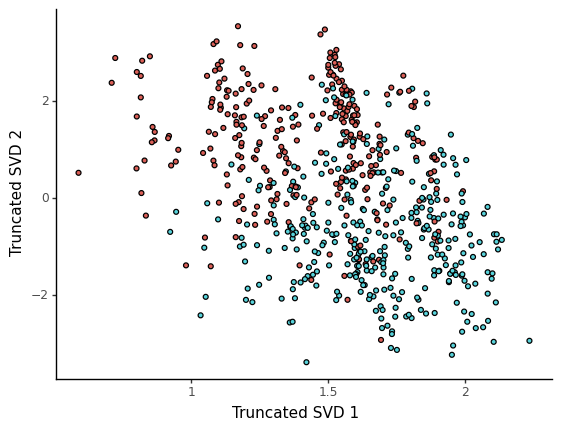

<ggplot: (181212691402)>

In [195]:
ggplot(x_tSVD_df, aes('x_tSVD_df[0]', 'x_tSVD_df[1]', fill = 'label')) + \
    geom_point() + \
    labs(x = 'Truncated SVD 1', y = 'Truncated SVD 2') + \
    theme_classic() + \
    theme(legend_position='none')

# 
# 
### Dictionary Learning
- https://bskyvision.com/177
- Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
- Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
- 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

### ```sklearn.decomposition.DictionaryLearning(n_components)```

In [6]:
from sklearn.decomposition import DictionaryLearning

In [7]:
DL = DictionaryLearning(n_components=2).fit(x_train_trans)
x_train_DL = DL.fit_transform(x_train_trans)
x_test_DL = DL.fit_transform(x_test_trans)

In [16]:
DL.components_.shape, len(DL.error_)

((2, 20), 29)

In [8]:
x_DL_df = pd.DataFrame(x_train_DL).assign(
    label = np.where(y_train == 1, '1', '0')
)

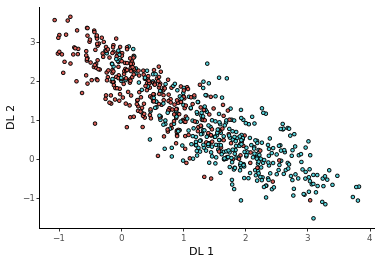

<ggplot: (136947772919)>

In [9]:
ggplot(x_DL_df, aes('x_DL_df[0]', 'x_DL_df[1]', fill = 'label')) + \
    geom_point() + \
    labs(x = 'DL 1', y = 'DL 2') + \
    theme_classic() + \
    theme(legend_position='none')

# 
# 
### Factor Analysis
- https://ysyblog.tistory.com/124
- 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
- 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
- PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려
### ```sklearn.decomposition.FactorAnalysis(n_components)```

In [17]:
from sklearn.decomposition import FactorAnalysis

In [18]:
FA = FactorAnalysis().fit(x_train_trans)
x_train_FA = FA.fit_transform(x_train_trans)
x_test_FA = FA.fit_transform(x_test_trans)

In [25]:
FA.components_.shape, len(FA.loglike_), FA.noise_variance_.shape

((20, 20), 3, (20,))

In [26]:
FA = FactorAnalysis(n_components=2).fit(x_train_trans)
x_train_FA = FA.fit_transform(x_train_trans)
x_test_FA = FA.fit_transform(x_test_trans)

In [27]:
x_FA_df = pd.DataFrame(x_train_FA).assign(
    label = np.where(y_train == 1, '1', '0')
)

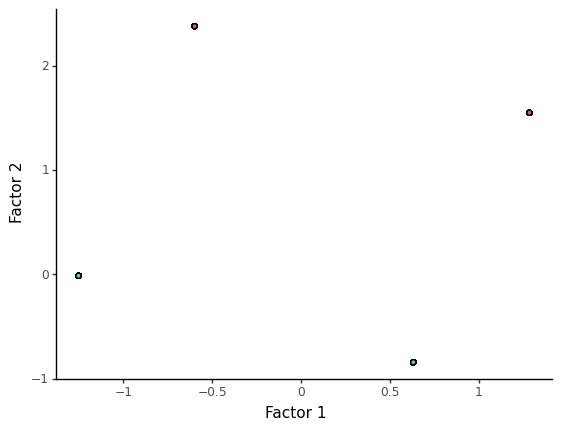

<ggplot: (136947824903)>

In [28]:
ggplot(x_FA_df, aes('x_FA_df[0]', 'x_FA_df[1]', fill = 'label')) + \
    geom_point() + \
    labs(x = 'Factor 1', y = 'Factor 2') + \
    theme_classic() + \
    theme(legend_position='none')

# 
# 
### Independent Component Analysis(ICA)
- https://angeloyeo.github.io/2020/07/14/ICA.html
- 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
- ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음
### ```sklearn.decomposition.FastICA(n_components)```

In [29]:
from sklearn.decomposition import FastICA

In [30]:
ICA = FastICA().fit(x_train_trans)
x_train_ICA = ICA.fit_transform(x_train_trans)
x_test_ICA = ICA.fit_transform(x_test_trans)

In [34]:
ICA.components_.shape, ICA.whitening_.shape

((20, 20), (20, 20))

In [35]:
ICA = FastICA(n_components=2).fit(x_train_trans)
x_train_ICA = ICA.fit_transform(x_train_trans)
x_test_ICA = ICA.fit_transform(x_test_trans)

In [36]:
x_ICA_df = pd.DataFrame(x_train_ICA).assign(
    label = np.where(y_train == 1, '1', '0')
)

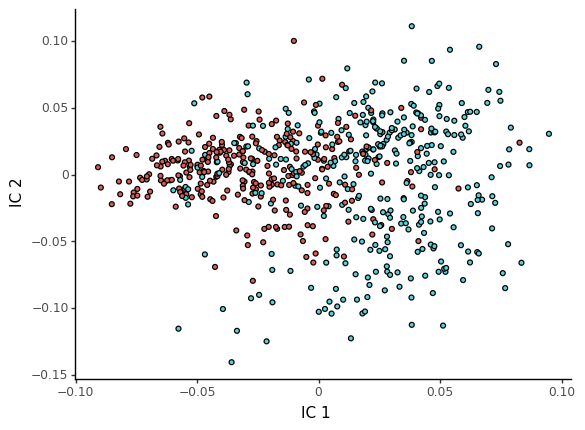

<ggplot: (136947821346)>

In [37]:
ggplot(x_ICA_df, aes('x_ICA_df[0]', 'x_ICA_df[1]', fill = 'label')) + \
    geom_point() + \
    labs(x = 'IC 1', y = 'IC 2') + \
    theme_classic() + \
    theme(legend_position='none')

# 
# 
### Latent Dirichlet Allocation (LDA, 잠재 디리클레 할당)
- https://wikidocs.net/30708
- 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
- 디리클레 분포에 따라 문서의 잠재적인 의미 구조를 파악

### ```sklearn.decomposition.LatentDirichletAllocation(n_components)```

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

# 
# 
### Linear Discriminant Analysis (LDA, 선형 판별 분석)
- https://ratsgo.github.io/machine%20learning/2017/03/21/LDA/
- LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
- LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스르 분별할 수 있는 기준을 최대한 유지하면서 차원 축소

### ```sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components)```

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
LDA = LinearDiscriminantAnalysis().fit(x_train_trans, y_train)

In [58]:
LDA.coef_, LDA.classes_, LDA.intercept_, LDA.xbar_

(array([[ 0.03993577,  0.1369216 , -0.38276302,  0.55601097, -0.2252555 ,
          0.43678266, -0.70831007,  0.70831007,  1.40945341, -1.07445702,
         -0.73203017,  0.1194458 ,  0.33237704, -0.0316306 , -0.28066612,
         -0.63396237,  0.63396237,  0.39314654,  1.80947059, -2.35309643]]),
 array([0, 1], dtype=int64),
 array([-0.17629087]),
 array([ 2.49800181e-16,  5.55111512e-17, -1.11022302e-16,  2.77555756e-16,
        -3.60822483e-16, -5.27355937e-16,  2.10280374e-01,  7.89719626e-01,
         5.28037383e-01,  2.05607477e-01,  2.16510903e-01,  4.98442368e-02,
         1.96261682e-01,  6.02803738e-01,  2.00934579e-01,  5.91900312e-01,
         4.08099688e-01,  7.32087227e-02,  4.90654206e-01,  4.36137072e-01]))

In [66]:
x_train_LDA = LDA.fit_transform(x_train_trans, y_train)
x_test_LDA = LDA.fit_transform(x_test_trans, y_test)
LDA.score(x_train_trans, y_train), LDA.score(x_test_trans, y_test)

(0.8644859813084113, 0.8695652173913043)